 # Generate files 'TrainMerge.csv' and 'TestMergedFinal.csv' by running R code.

# Models

In [21]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,recall_score,classification_report,precision_score,confusion_matrix,mean_absolute_error,mean_squared_error
%matplotlib inline

In [22]:
import os
os.chdir("C:/Users/Dinesh Pupala/Desktop/PHD dataset")

In [29]:
TrainData = pd.read_csv("TrainMerge.csv")
TrainData.head()
TrainData.columns
TrainData.drop(TrainData.columns[0],axis=1,inplace=True)
TrainData.head(10)

,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,DiagnosisGroupCode,AdmitDays,CHF,Valvular,PHTN,PVD,HTN,...,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,AdmitType,PotentialFraud,ClaimDays
0,PRV55912,26000,1068,4,6,False,False,False,False,True,...,1,1,36000,3204,60,70,75,InPatient,Yes,6
1,PRV55907,5000,1068,13,2,False,False,False,False,False,...,1,1,36000,3204,60,70,75,InPatient,No,2
2,PRV56046,5000,1068,19,3,False,False,False,False,False,...,1,1,36000,3204,60,70,75,InPatient,No,3
3,PRV52405,5000,1068,1,8,False,False,False,False,True,...,1,1,5000,1068,250,320,104,InPatient,No,8
4,PRV56614,10000,1068,25,17,False,False,False,False,False,...,2,2,21260,2136,120,100,80,InPatient,No,17
5,PRV54986,8000,1068,9,6,False,False,False,False,False,...,1,1,22000,2136,1400,840,78,InPatient,Yes,6
6,PRV54090,8000,1068,6,5,False,False,False,False,True,...,1,2,8000,1068,860,50,79,InPatient,No,5
7,PRV51148,6000,1068,6,4,False,False,False,True,False,...,2,2,6000,1068,0,0,77,InPatient,Yes,4
8,PRV55839,7000,1068,5,3,True,False,False,False,True,...,2,2,23650,2136,40,0,74,InPatient,No,3
9,PRV55215,29000,1068,5,7,False,False,False,False,True,...,1,1,131140,2136,1650,80,72,InPatient,Yes,7


In [30]:
TestData = pd.read_csv("TestMergedFinal.csv")
TestData.head()
TestData.columns
TestData.drop(TestData.columns[0],axis=1,inplace=True)
TestData.head(10)

,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,DiagnosisGroupCode,AdmitDays,CHF,Valvular,PHTN,PVD,HTN,...,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,AdmitType,ClaimDays
0,PRV57070,9000,1068,6,7,True,False,False,False,True,...,2,2,2,21260,2136,120,100,80,InPatient,7
1,PRV54750,14000,1068,11,14,False,False,False,False,False,...,2,1,1,22000,2136,1400,840,78,InPatient,14
2,PRV53758,2000,1068,5,4,False,False,False,False,True,...,2,2,2,2000,1068,0,0,80,InPatient,4
3,PRV55825,16000,1068,8,13,False,False,True,False,True,...,1,2,2,23650,2136,40,0,74,InPatient,13
4,PRV52338,19000,1068,19,11,False,False,False,False,False,...,1,2,2,19000,1068,1670,520,55,InPatient,11
5,PRV55544,1000,1068,5,1,False,False,False,False,False,...,2,2,2,1000,1068,300,40,82,InPatient,1
6,PRV53275,3000,1068,7,3,False,False,False,False,True,...,2,2,2,3150,1068,1190,430,87,InPatient,3
7,PRV54989,4000,1068,4,11,True,False,False,False,True,...,2,2,2,12000,2136,1070,210,80,InPatient,11
8,PRV57214,15000,1068,18,0,False,False,False,False,False,...,2,2,2,15030,1068,1020,330,78,InPatient,0
9,PRV52117,19000,1068,4,7,False,False,False,False,False,...,1,2,1,19000,1068,110,50,80,InPatient,7


In [31]:
ProviderDataTrain = TrainData[['Provider','PotentialFraud']].drop_duplicates()
#TrainData['PotentialFraud'].value_counts()

In [32]:
ProviderDataTest = TrainData[['Provider']].drop_duplicates()

In [33]:
ProviderDataTrain.head()

,Provider,PotentialFraud
0,PRV55912,Yes
1,PRV55907,No
2,PRV56046,No
3,PRV52405,No
4,PRV56614,No


# Approach:

# We need to build a predictive model that takes set of transactions for each provider and determines whether the provider is fradulent or not. So, we need to transform given data at transaction level to Provider level. 

# The Machine Learning approach I am following to solve this problem is as follows: 
# 1) Cluster all the transactions into different clusters.
# 2) Create a data frame at provider level by having a column for each cluster.
# 3) Each row belongs to a provider and contains counts of transactions in each cluster.
# 4) Build a predictive model on top of above data.

In [34]:
# Do Stratified Samling by Provider, Potential Fraud (yes/no)
ProviderTrain,ProviderVal,TrainFraud,ValFraud = train_test_split( ProviderDataTrain['Provider'],ProviderDataTrain['PotentialFraud'], test_size=0.3, 
                                                                    random_state=42, stratify=ProviderDataTrain['PotentialFraud'])

In [35]:
ProviderVal.shape[0]

1623

In [36]:
xtrain = TrainData[TrainData['Provider'].isin(ProviderTrain)]

In [37]:
xval = TrainData[TrainData['Provider'].isin(ProviderVal)]

In [38]:
xval.shape

(160488, 72)

In [ ]:
# Convert categorical attributes to type category.

In [39]:
xtrain['DeductibleAmtPaid'] = xtrain['DeductibleAmtPaid'].astype("category")
xtrain['DiagnosisGroupCode'] = xtrain['DiagnosisGroupCode'].astype("category")
for column in range(4,64):
    xtrain.iloc[column] = xtrain.iloc[column].astype("category")

C:\Users\Dinesh Pupala\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dinesh Pupala\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Dinesh Pupala\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [40]:
xval['DeductibleAmtPaid'] = xval['DeductibleAmtPaid'].astype("category")
xval['DiagnosisGroupCode'] = xval['DiagnosisGroupCode'].astype("category")
for column in range(4,64):
    xval.iloc[column] = xval.iloc[column].astype("category")

C:\Users\Dinesh Pupala\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dinesh Pupala\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Dinesh Pupala\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [41]:
TestData['DeductibleAmtPaid'] = TestData['DeductibleAmtPaid'].astype("category")
TestData['DiagnosisGroupCode'] = TestData['DiagnosisGroupCode'].astype("category")
for column in range(4,64):
    TestData.iloc[column] = TestData.iloc[column].astype("category")

In [42]:
#Drop provider from Train and Val
ProviderTrainfull = xtrain['Provider']
xtrain = xtrain.drop(['Provider','PotentialFraud'],axis=1)
Providervalfull = xval['Provider']
xval = xval.drop(['Provider','PotentialFraud'],axis=1)

# Discretize the numerical attributesby data distribution using visulazations in RMD file.

In [44]:
Agebins = [0,75,200]
xtrain['Agebinned']= np.searchsorted(Agebins, xtrain['Age'].values)
xval['Agebinned']= np.searchsorted(Agebins, xval['Age'].values)
InscClaimRbins = [0,2500,200000]
xtrain['InscClaimRbins']= np.searchsorted(InscClaimRbins, xtrain['InscClaimAmtReimbursed'].values)
xval['InscClaimRbins']= np.searchsorted(InscClaimRbins, xval['InscClaimAmtReimbursed'].values)
OPAnnualRbins = [0,5000,25000,50000,200000]
xtrain['OPAnnualRbins']= np.searchsorted(OPAnnualRbins, xtrain['OPAnnualReimbursementAmt'].values)
xval['OPAnnualRbins']= np.searchsorted(OPAnnualRbins, xval['OPAnnualReimbursementAmt'].values)
IPAnnualRbins = [0,12500,25000,200000]
xtrain['IPAnnualRbins']= np.searchsorted(IPAnnualRbins, xtrain['IPAnnualReimbursementAmt'].values)
xval['IPAnnualRbins']= np.searchsorted(IPAnnualRbins, xval['IPAnnualReimbursementAmt'].values)
OPDeductRbins = [0,2500,7500,20000]
xtrain['OPDeductRbins']= np.searchsorted(OPDeductRbins, xtrain['OPAnnualDeductibleAmt'].values)
xval['OPDeductRbins']= np.searchsorted(OPDeductRbins, xval['OPAnnualDeductibleAmt'].values)
IPDeductRbins = [0,1100,2200,3300,20000]
xtrain['IPDeductRbins']= np.searchsorted(IPDeductRbins, xtrain['IPAnnualDeductibleAmt'].values)
xval['IPDeductRbins']= np.searchsorted(IPDeductRbins, xval['IPAnnualDeductibleAmt'].values)
Claimbins = [0,1,2,17,24,100]
xtrain['Claimbins']= np.searchsorted(Claimbins, xtrain['ClaimDays'].values)
xval['Claimbins']= np.searchsorted(Claimbins, xval['ClaimDays'].values)
TestData['Claimbins']= np.searchsorted(Claimbins, TestData['ClaimDays'].values)
Admitbins = [0,10,100]
xtrain['Admitbins']= np.searchsorted(Claimbins, xtrain['AdmitDays'].values)
xval['Admitbins']= np.searchsorted(Claimbins, xval['AdmitDays'].values)
TestData['Admitbins']= np.searchsorted(Claimbins, TestData['AdmitDays'].values)
TestData['Claimbins']= np.searchsorted(Claimbins, TestData['ClaimDays'].values)
TestData['IPDeductRbins']= np.searchsorted(IPDeductRbins, TestData['IPAnnualDeductibleAmt'].values)
TestData['OPDeductRbins']= np.searchsorted(OPDeductRbins, TestData['OPAnnualDeductibleAmt'].values)
TestData['IPAnnualRbins']= np.searchsorted(IPAnnualRbins, TestData['IPAnnualReimbursementAmt'].values)
TestData['OPAnnualRbins']= np.searchsorted(OPAnnualRbins, TestData['OPAnnualReimbursementAmt'].values)
TestData['InscClaimRbins']= np.searchsorted(InscClaimRbins, TestData['InscClaimAmtReimbursed'].values)
TestData['Agebinned']= np.searchsorted(Agebins, TestData['Age'].values)

In [45]:
xtrain = xtrain.drop(['AdmitDays','ClaimDays','InscClaimAmtReimbursed','IPAnnualReimbursementAmt','IPAnnualDeductibleAmt',
             'OPAnnualReimbursementAmt','OPAnnualDeductibleAmt','Age'],axis=1)
xval=xval.drop(['AdmitDays','ClaimDays','InscClaimAmtReimbursed','IPAnnualReimbursementAmt','IPAnnualDeductibleAmt',
             'OPAnnualReimbursementAmt','OPAnnualDeductibleAmt','Age'],axis=1)
TestData=TestData.drop(['AdmitDays','ClaimDays','InscClaimAmtReimbursed','IPAnnualReimbursementAmt','IPAnnualDeductibleAmt',
             'OPAnnualReimbursementAmt','OPAnnualDeductibleAmt','Age'],axis=1)

In [47]:
# Convert newly derived attributes to categories.
for column in range(65,71):
    xtrain.iloc[column] = xtrain.iloc[column].astype("category")
    xval.iloc[column] = xval.iloc[column].astype("category")
    TestData.iloc[column] = TestData.iloc[column].astype("category")

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split

In [50]:
# Label encode the categorical attributes
for column in xtrain.columns:
    if xtrain[column].dtype == type(object):
        le = preprocessing.LabelEncoder()
        xtrain[column] = le.fit_transform(xtrain[column])
for column in xval.columns:
    if xval[column].dtype == type(object):
        le = preprocessing.LabelEncoder()
        xval[column] = le.fit_transform(xval[column])
ProviderTest = TestData['Provider']
TestData=TestData.drop('Provider',axis=1)
for column in TestData.columns:
    if TestData[column].dtype == type(object):
        le = preprocessing.LabelEncoder()
        TestData[column] = le.fit_transform(TestData[column])
    

In [51]:
xtrain.head()

,DeductibleAmtPaid,DiagnosisGroupCode,CHF,Valvular,PHTN,PVD,HTN,Paralysis,NeuroOther,Pulmonary,...,ChronicCond_stroke,AdmitType,Agebinned,InscClaimRbins,OPAnnualRbins,IPAnnualRbins,OPDeductRbins,IPDeductRbins,Claimbins,Admitbins
1,1068,13,0,False,False,False,0,0,0,0,...,0,0,0,2,1,3,1,3,2,2
2,1068,19,0,False,False,False,0,0,1,0,...,0,0,0,2,1,3,1,3,3,3
7,1068,6,0,False,False,True,0,0,0,0,...,1,0,1,2,0,1,0,1,3,3
9,1068,5,0,False,False,False,1,0,0,0,...,0,0,0,2,1,3,1,2,3,3
10,1068,18,0,False,False,False,0,0,0,0,...,0,0,0,2,1,3,1,2,3,3


# Cluster all transactions

In [52]:
# Number of clusters
kmeans = KMeans(n_clusters=5,random_state=148461)
# Fitting the input data
kmeans = kmeans.fit(xtrain)
# Getting the cluster labels
labels = kmeans.predict(xtrain)
# Centroid values
centroids = kmeans.cluster_centers_

In [53]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=148461, tol=0.0001, verbose=0)

In [54]:
centroids

array([[ 1.06800000e+03,  1.13539495e+01,  2.37217804e-01,
         7.14321000e-02,  4.48056118e-02,  7.83480709e-02,
         4.63123055e-01,  4.16440251e-02,  1.38072420e-01,
         2.29857235e-01,  1.89250605e-01,  6.08111446e-02,
         1.04381762e-01,  1.82631033e-01,  1.94635183e-02,
         8.39796473e-04,  2.56878921e-03,  1.20041496e-02,
         4.80659981e-02,  6.12063429e-02,  3.04302722e-02,
         3.39376575e-02,  7.41490886e-02,  5.31047770e-02,
         2.54260732e-01,  1.32391444e-02,  1.38319419e-01,
         2.70710863e-02,  2.26251050e-02,  7.40996888e-02,
         7.31610927e-02,  1.23005483e-02,  6.57017241e-03,
         4.93997925e-05,  9.87995850e-05,  3.06278714e-03,
         9.38596058e-04,  2.67746875e-02,  9.87995850e-05,
         6.02677469e-03,  4.93997925e-05,  3.95198340e-03,
         0.00000000e+00,  5.76001581e-01,  2.35488811e-01,
         2.59645309e-01,  2.38348071e+01,  4.97146174e+01,
         1.19138468e+01,  1.19243689e+01,  4.99036704e-0

In [ ]:
# Find optimal number of clusters

In [55]:
wss= {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(xtrain)
    clusters = kmeans.labels_
    wss[k] = kmeans.inertia_

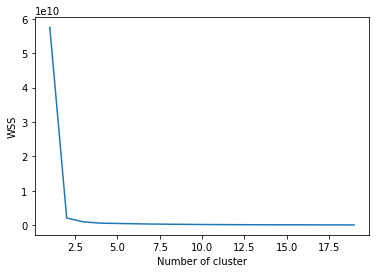

In [57]:
plt.figure()
plt.plot(list(wss.keys()), list(wss.values()))
plt.xlabel("Number of cluster")
plt.ylabel("WSS")
plt.show()

# Check Clusters Stability by using rand score

In [58]:
from sklearn.metrics import adjusted_rand_score
import numpy as np

In [59]:
indices=xtrain.sample(frac=0.9,random_state=1234).index
print(indices)


Int64Index([503113, 221000, 365186, 339473, 533533,  27726, 519197, 318936,
            419287, 522353,
            ...
             89040,  21463, 201429, 129762, 466668,  50283, 278624, 133402,
            163737, 253341],
           dtype='int64', length=357951)


In [60]:
Alpha=xtrain.loc[indices,:]

In [61]:
Alpha.shape

(357951, 70)

In [62]:
kmeans2 = KMeans(n_clusters=11)
kmeans2 = kmeans2.fit(xtrain)
print(len(kmeans2.labels_))
xtrain['clus']=kmeans2.labels_

397723


In [63]:
kmeans3=kmeans2.fit(Alpha)
print(len(kmeans3.labels_))
Alpha['clus']=kmeans3.labels_

357951


In [64]:
g1=xtrain.loc[indices,'clus']
g2=Alpha.clus

In [65]:
adjusted_rand_score(g1,g2)

0.9968072673542435

In [66]:
xtrain = xtrain.drop('clus',axis=1)

In [67]:
# Fitting the train data
kmeans4 = kmeans2.fit(xtrain)
# Getting the cluster labels
TrainPred = kmeans4.predict(xtrain)

In [68]:
# Fitting the Validation data
kmeans5 = kmeans2.fit(xval)
# Getting the cluster labels
ValPred = kmeans5.predict(xval)

In [69]:
# Fitting the test data
kmeans6 = kmeans2.fit(TestData)
# Getting the cluster labels
TestPred = kmeans6.predict(TestData)

In [70]:
TrainPredLong = pd.concat([ProviderTrainfull.reset_index(drop=True), pd.DataFrame(TrainPred).reset_index(drop=True)], axis=1)
ValPredLong = pd.concat([Providervalfull.reset_index(drop=True), pd.DataFrame(ValPred).reset_index(drop=True)], axis=1)
TestPredLong = pd.concat([ProviderTest.reset_index(drop=True), pd.DataFrame(TestPred).reset_index(drop=True)], axis=1)

In [ ]:
# Separate out clusters so as to transform the data at provider level.

In [71]:
Cluster1ProvT = TrainPredLong[TrainPredLong[0]==1]
Cluster2ProvT = TrainPredLong[TrainPredLong[0]==2]
Cluster3ProvT = TrainPredLong[TrainPredLong[0]==3]
Cluster4ProvT = TrainPredLong[TrainPredLong[0]==4]
Cluster5ProvT = TrainPredLong[TrainPredLong[0]==5]
Cluster6ProvT = TrainPredLong[TrainPredLong[0]==6]
Cluster7ProvT = TrainPredLong[TrainPredLong[0]==7]
Cluster8ProvT = TrainPredLong[TrainPredLong[0]==8]
Cluster0ProvT = TrainPredLong[TrainPredLong[0]==0]
Cluster9ProvT = TrainPredLong[TrainPredLong[0]==9]
Cluster10ProvT = TrainPredLong[TrainPredLong[0]==10]
#Cluster11ProvT = TrainPredLong[TrainPredLong[0]==11]
Cluster1countsT = Cluster1ProvT['Provider'].value_counts()
Cluster2countsT = Cluster2ProvT['Provider'].value_counts()
Cluster3countsT = Cluster3ProvT['Provider'].value_counts()
Cluster4countsT = Cluster4ProvT['Provider'].value_counts()
Cluster5countsT = Cluster5ProvT['Provider'].value_counts()
Cluster6countsT = Cluster6ProvT['Provider'].value_counts()
Cluster7countsT = Cluster7ProvT['Provider'].value_counts()
Cluster8countsT = Cluster8ProvT['Provider'].value_counts()
Cluster0countsT = Cluster0ProvT['Provider'].value_counts()
Cluster9countsT = Cluster9ProvT['Provider'].value_counts()
Cluster10countsT = Cluster10ProvT['Provider'].value_counts()
#Cluster11countsT = Cluster11ProvT['Provider'].value_counts()

In [72]:
Cluster1ProvTs = TestPredLong[TestPredLong[0]==1]
Cluster2ProvTs = TestPredLong[TestPredLong[0]==2]
Cluster3ProvTs = TestPredLong[TestPredLong[0]==3]
Cluster4ProvTs = TestPredLong[TestPredLong[0]==4]
Cluster5ProvTs = TestPredLong[TestPredLong[0]==5]
Cluster6ProvTs = TestPredLong[TestPredLong[0]==6]
Cluster7ProvTs = TestPredLong[TestPredLong[0]==7]
Cluster8ProvTs = TestPredLong[TestPredLong[0]==8]
Cluster0ProvTs = TestPredLong[TestPredLong[0]==0]
Cluster9ProvTs = TestPredLong[TestPredLong[0]==9]
Cluster10ProvTs = TestPredLong[TestPredLong[0]==10]
#Cluster11ProvT = TrainPredLong[TrainPredLong[0]==11]

Cluster1countsTs = Cluster1ProvTs['Provider'].value_counts()
Cluster2countsTs = Cluster2ProvTs['Provider'].value_counts()
Cluster3countsTs = Cluster3ProvTs['Provider'].value_counts()
Cluster4countsTs = Cluster4ProvTs['Provider'].value_counts()
Cluster5countsTs = Cluster5ProvTs['Provider'].value_counts()
Cluster6countsTs = Cluster6ProvTs['Provider'].value_counts()
Cluster7countsTs = Cluster7ProvTs['Provider'].value_counts()
Cluster8countsTs = Cluster8ProvTs['Provider'].value_counts()
Cluster0countsTs = Cluster0ProvTs['Provider'].value_counts()
Cluster9countsTs = Cluster9ProvTs['Provider'].value_counts()
Cluster10countsTs = Cluster10ProvTs['Provider'].value_counts()
#Cluster11countsT = Cluster11ProvT['Provider'].value_counts()

In [73]:
Cluster1ProvV = ValPredLong[ValPredLong[0]==1]
Cluster2ProvV = ValPredLong[ValPredLong[0]==2]
Cluster3ProvV = ValPredLong[ValPredLong[0]==3]
Cluster4ProvV = ValPredLong[ValPredLong[0]==4]
Cluster5ProvV = ValPredLong[ValPredLong[0]==5]
Cluster6ProvV = ValPredLong[ValPredLong[0]==6]
Cluster7ProvV = ValPredLong[ValPredLong[0]==7]
Cluster8ProvV = ValPredLong[ValPredLong[0]==8]
Cluster0ProvV = ValPredLong[ValPredLong[0]==0]
Cluster9ProvV = ValPredLong[ValPredLong[0]==9]
Cluster10ProvV = ValPredLong[ValPredLong[0]==10]
#Cluster11ProvV = ValPredLong[ValPredLong[0]==11]
Cluster1countsV = Cluster1ProvV['Provider'].value_counts()
Cluster2countsV = Cluster2ProvV['Provider'].value_counts()
Cluster3countsV = Cluster3ProvV['Provider'].value_counts()
Cluster4countsV = Cluster4ProvV['Provider'].value_counts()
Cluster5countsV = Cluster5ProvV['Provider'].value_counts()
Cluster6countsV = Cluster6ProvV['Provider'].value_counts()
Cluster7countsV = Cluster7ProvV['Provider'].value_counts()
Cluster8countsV = Cluster8ProvV['Provider'].value_counts()
Cluster0countsV = Cluster0ProvV['Provider'].value_counts()
Cluster9countsV = Cluster9ProvV['Provider'].value_counts()
Cluster10countsV = Cluster10ProvV['Provider'].value_counts()
#Cluster11countsV = Cluster11ProvV['Provider'].value_counts()

In [74]:
ValPredLong[ValPredLong[0]==1]

,Provider,0
1,PRV52405,1
7,PRV55834,1
9,PRV51710,1
10,PRV53135,1
11,PRV53135,1
12,PRV57523,1
19,PRV57555,1
22,PRV54894,1
26,PRV52021,1
36,PRV51501,1


In [ ]:
# Club cluster data with their respective provider data

In [75]:
ClusterData1T = pd.concat([pd.DataFrame(Cluster1countsT.axes[0].tolist()).reset_index(drop=True), pd.DataFrame(Cluster1countsT).reset_index(drop=True)], axis=1)
ClusterData1T.columns = ['Provider','One']
ClusterData2T = pd.concat([pd.DataFrame(Cluster2countsT.axes[0].tolist()).reset_index(drop=True), pd.DataFrame(Cluster2countsT).reset_index(drop=True)], axis=1)
ClusterData2T.columns = ['Provider','Two']
ClusterData3T = pd.concat([pd.DataFrame(Cluster3countsT.axes[0].tolist()).reset_index(drop=True), pd.DataFrame(Cluster3countsT).reset_index(drop=True)], axis=1)
ClusterData3T.columns = ['Provider','Three']
ClusterData4T = pd.concat([pd.DataFrame(Cluster4countsT.axes[0].tolist()).reset_index(drop=True), pd.DataFrame(Cluster4countsT).reset_index(drop=True)], axis=1)
ClusterData4T.columns = ['Provider','Four']
ClusterData5T = pd.concat([pd.DataFrame(Cluster5countsT.axes[0].tolist()).reset_index(drop=True), pd.DataFrame(Cluster5countsT).reset_index(drop=True)], axis=1)
ClusterData5T.columns = ['Provider','Five']
ClusterData6T = pd.concat([pd.DataFrame(Cluster6countsT.axes[0].tolist()).reset_index(drop=True), pd.DataFrame(Cluster6countsT).reset_index(drop=True)], axis=1)
ClusterData6T.columns = ['Provider','Six']
ClusterData7T = pd.concat([pd.DataFrame(Cluster7countsT.axes[0].tolist()).reset_index(drop=True), pd.DataFrame(Cluster7countsT).reset_index(drop=True)], axis=1)
ClusterData7T.columns = ['Provider','Seven']
ClusterData8T = pd.concat([pd.DataFrame(Cluster8countsT.axes[0].tolist()).reset_index(drop=True), pd.DataFrame(Cluster8countsT).reset_index(drop=True)], axis=1)
ClusterData8T.columns = ['Provider','Eight']
ClusterData0T = pd.concat([pd.DataFrame(Cluster0countsT.axes[0].tolist()).reset_index(drop=True), pd.DataFrame(Cluster0countsT).reset_index(drop=True)], axis=1)
ClusterData0T.columns = ['Provider','Zero']
ClusterData9T = pd.concat([pd.DataFrame(Cluster9countsT.axes[0].tolist()).reset_index(drop=True), pd.DataFrame(Cluster9countsT).reset_index(drop=True)], axis=1)
ClusterData9T.columns = ['Provider','Nine']
ClusterData10T = pd.concat([pd.DataFrame(Cluster10countsT.axes[0].tolist()).reset_index(drop=True), pd.DataFrame(Cluster10countsT).reset_index(drop=True)], axis=1)
ClusterData10T.columns = ['Provider','Ten']
#ClusterData11T = pd.concat([pd.DataFrame(Cluster11countsT.axes[0].tolist()).reset_index(drop=True), pd.DataFrame(Cluster11countsT).reset_index(drop=True)], axis=1)
#ClusterData11T.columns = ['Provider','Eleven']

In [76]:
ClusterData1V = pd.concat([pd.DataFrame(Cluster1countsV.axes[0].tolist()).reset_index(drop=True), pd.DataFrame(Cluster1countsV).reset_index(drop=True)], axis=1)
ClusterData1V.columns = ['Provider','One']
ClusterData2V = pd.concat([pd.DataFrame(Cluster2countsV.axes[0].tolist()).reset_index(drop=True), pd.DataFrame(Cluster2countsV).reset_index(drop=True)], axis=1)
ClusterData2V.columns = ['Provider','Two']
ClusterData3V = pd.concat([pd.DataFrame(Cluster3countsV.axes[0].tolist()).reset_index(drop=True), pd.DataFrame(Cluster3countsV).reset_index(drop=True)], axis=1)
ClusterData3V.columns = ['Provider','Three']
ClusterData4V = pd.concat([pd.DataFrame(Cluster4countsV.axes[0].tolist()).reset_index(drop=True), pd.DataFrame(Cluster4countsV).reset_index(drop=True)], axis=1)
ClusterData4V.columns = ['Provider','Four']
ClusterData5V = pd.concat([pd.DataFrame(Cluster5countsV.axes[0].tolist()).reset_index(drop=True), pd.DataFrame(Cluster5countsV).reset_index(drop=True)], axis=1)
ClusterData5V.columns = ['Provider','Five']
ClusterData6V = pd.concat([pd.DataFrame(Cluster6countsV.axes[0].tolist()).reset_index(drop=True), pd.DataFrame(Cluster6countsV).reset_index(drop=True)], axis=1)
ClusterData6V.columns = ['Provider','Six']
ClusterData7V = pd.concat([pd.DataFrame(Cluster7countsV.axes[0].tolist()).reset_index(drop=True), pd.DataFrame(Cluster7countsV).reset_index(drop=True)], axis=1)
ClusterData7V.columns = ['Provider','Seven']
ClusterData8V = pd.concat([pd.DataFrame(Cluster8countsV.axes[0].tolist()).reset_index(drop=True), pd.DataFrame(Cluster8countsV).reset_index(drop=True)], axis=1)
ClusterData8V.columns = ['Provider','Eight']
ClusterData0V = pd.concat([pd.DataFrame(Cluster0countsV.axes[0].tolist()).reset_index(drop=True), pd.DataFrame(Cluster0countsV).reset_index(drop=True)], axis=1)
ClusterData0V.columns = ['Provider','Zero']
ClusterData9V = pd.concat([pd.DataFrame(Cluster9countsV.axes[0].tolist()).reset_index(drop=True), pd.DataFrame(Cluster9countsV).reset_index(drop=True)], axis=1)
ClusterData9V.columns = ['Provider','Nine']
ClusterData10V = pd.concat([pd.DataFrame(Cluster10countsV.axes[0].tolist()).reset_index(drop=True), pd.DataFrame(Cluster10countsV).reset_index(drop=True)], axis=1)
ClusterData10V.columns = ['Provider','Ten']
#ClusterData11V = pd.concat([pd.DataFrame(Cluster11countsV.axes[0].tolist()).reset_index(drop=True), pd.DataFrame(Cluster11countsV).reset_index(drop=True)], axis=1)
#ClusterData11V.columns = ['Provider','Eleven']

In [77]:
ClusterData1Ts = pd.concat([pd.DataFrame(Cluster1countsTs.axes[0].tolist()).reset_index(drop=True), pd.DataFrame(Cluster1countsTs).reset_index(drop=True)], axis=1)
ClusterData1Ts.columns = ['Provider','One']
ClusterData2Ts = pd.concat([pd.DataFrame(Cluster2countsTs.axes[0].tolist()).reset_index(drop=True), pd.DataFrame(Cluster2countsTs).reset_index(drop=True)], axis=1)
ClusterData2Ts.columns = ['Provider','Two']
ClusterData3Ts = pd.concat([pd.DataFrame(Cluster3countsTs.axes[0].tolist()).reset_index(drop=True), pd.DataFrame(Cluster3countsTs).reset_index(drop=True)], axis=1)
ClusterData3Ts.columns = ['Provider','Three']
ClusterData4Ts = pd.concat([pd.DataFrame(Cluster4countsTs.axes[0].tolist()).reset_index(drop=True), pd.DataFrame(Cluster4countsTs).reset_index(drop=True)], axis=1)
ClusterData4Ts.columns = ['Provider','Four']
ClusterData5Ts = pd.concat([pd.DataFrame(Cluster5countsTs.axes[0].tolist()).reset_index(drop=True), pd.DataFrame(Cluster5countsTs).reset_index(drop=True)], axis=1)
ClusterData5Ts.columns = ['Provider','Five']
ClusterData6Ts = pd.concat([pd.DataFrame(Cluster6countsTs.axes[0].tolist()).reset_index(drop=True), pd.DataFrame(Cluster6countsTs).reset_index(drop=True)], axis=1)
ClusterData6Ts.columns = ['Provider','Six']
ClusterData7Ts = pd.concat([pd.DataFrame(Cluster7countsTs.axes[0].tolist()).reset_index(drop=True), pd.DataFrame(Cluster7countsTs).reset_index(drop=True)], axis=1)
ClusterData7Ts.columns = ['Provider','Seven']
ClusterData8Ts = pd.concat([pd.DataFrame(Cluster8countsTs.axes[0].tolist()).reset_index(drop=True), pd.DataFrame(Cluster8countsTs).reset_index(drop=True)], axis=1)
ClusterData8Ts.columns = ['Provider','Eight']
ClusterData0Ts = pd.concat([pd.DataFrame(Cluster0countsTs.axes[0].tolist()).reset_index(drop=True), pd.DataFrame(Cluster0countsTs).reset_index(drop=True)], axis=1)
ClusterData0Ts.columns = ['Provider','Zero']
ClusterData9Ts = pd.concat([pd.DataFrame(Cluster9countsTs.axes[0].tolist()).reset_index(drop=True), pd.DataFrame(Cluster9countsTs).reset_index(drop=True)], axis=1)
ClusterData9Ts.columns = ['Provider','Nine']
ClusterData10Ts = pd.concat([pd.DataFrame(Cluster10countsTs.axes[0].tolist()).reset_index(drop=True), pd.DataFrame(Cluster10countsTs).reset_index(drop=True)], axis=1)
ClusterData10Ts.columns = ['Provider','Ten']
#ClusterData11V = pd.concat([pd.DataFrame(Cluster11countsV.axes[0].tolist()).reset_index(drop=True), pd.DataFrame(Cluster11countsV).reset_index(drop=True)], axis=1)
#ClusterData11V.columns = ['Provider','Eleven']

In [ ]:
# Merge all Clusters into single data frame using OUTER join on Provider and fill any 'NA's created with '0' , 
# means 0 transactions.

In [78]:
TrainMatrix = pd.merge(pd.DataFrame(ClusterData0T),pd.DataFrame(ClusterData1T), how='outer')
TrainMatrix = pd.merge(pd.DataFrame(TrainMatrix),pd.DataFrame(ClusterData2T), how='outer')
TrainMatrix = pd.merge(pd.DataFrame(TrainMatrix),pd.DataFrame(ClusterData3T), how='outer')
TrainMatrix = pd.merge(pd.DataFrame(TrainMatrix),pd.DataFrame(ClusterData4T), how='outer')
TrainMatrix = pd.merge(pd.DataFrame(TrainMatrix),pd.DataFrame(ClusterData5T), how='outer')
TrainMatrix = pd.merge(pd.DataFrame(TrainMatrix),pd.DataFrame(ClusterData6T), how='outer')
TrainMatrix = pd.merge(pd.DataFrame(TrainMatrix),pd.DataFrame(ClusterData7T), how='outer')
TrainMatrix = pd.merge(pd.DataFrame(TrainMatrix),pd.DataFrame(ClusterData8T), how='outer')
TrainMatrix = pd.merge(pd.DataFrame(TrainMatrix),pd.DataFrame(ClusterData9T), how='outer')
TrainMatrix = pd.merge(pd.DataFrame(TrainMatrix),pd.DataFrame(ClusterData10T), how='outer')
#TrainMatrix = pd.merge(pd.DataFrame(TrainMatrix),pd.DataFrame(ClusterData11T), how='outer')
TrainMatrix = TrainMatrix.fillna(0)

In [79]:
TrainMatrix.shape[0]

3787

In [80]:
ValMatrix = pd.merge(pd.DataFrame(ClusterData0V),pd.DataFrame(ClusterData1V), how='outer')
ValMatrix = pd.merge(pd.DataFrame(ValMatrix),pd.DataFrame(ClusterData2V), how='outer')
ValMatrix = pd.merge(pd.DataFrame(ValMatrix),pd.DataFrame(ClusterData3V), how='outer')
ValMatrix = pd.merge(pd.DataFrame(ValMatrix),pd.DataFrame(ClusterData4V), how='outer')
ValMatrix = pd.merge(pd.DataFrame(ValMatrix),pd.DataFrame(ClusterData5V), how='outer')
ValMatrix = pd.merge(pd.DataFrame(ValMatrix),pd.DataFrame(ClusterData6V), how='outer')
ValMatrix = pd.merge(pd.DataFrame(ValMatrix),pd.DataFrame(ClusterData7V), how='outer')
ValMatrix = pd.merge(pd.DataFrame(ValMatrix),pd.DataFrame(ClusterData8V), how='outer')
ValMatrix = pd.merge(pd.DataFrame(ValMatrix),pd.DataFrame(ClusterData9V), how='outer')
ValMatrix = pd.merge(pd.DataFrame(ValMatrix),pd.DataFrame(ClusterData10V), how='outer')
#ValMatrix = pd.merge(pd.DataFrame(ValMatrix),pd.DataFrame(ClusterData11V), how='outer')
ValMatrix = ValMatrix.fillna(0)

In [81]:
ValMatrix.head()

,Provider,Zero,One,Two,Three,Four,Five,Six,Seven,Eight,Nine,Ten
0,PRV55004,2034.0,0.0,0.0,4.0,36.0,0.0,0.0,65.0,3.0,184.0,73.0
1,PRV56689,1626.0,0.0,13.0,41.0,16.0,0.0,0.0,32.0,0.0,7.0,59.0
2,PRV54778,983.0,2.0,0.0,0.0,555.0,0.0,0.0,4.0,62.0,19.0,47.0
3,PRV55552,798.0,1.0,0.0,32.0,304.0,0.0,3.0,0.0,0.0,34.0,34.0
4,PRV54761,773.0,0.0,0.0,0.0,14.0,0.0,0.0,3.0,0.0,6.0,26.0


In [82]:
TestMatrix = pd.merge(pd.DataFrame(ClusterData0Ts),pd.DataFrame(ClusterData1Ts), how='outer')
TestMatrix = pd.merge(pd.DataFrame(TestMatrix),pd.DataFrame(ClusterData2Ts), how='outer')
TestMatrix = pd.merge(pd.DataFrame(TestMatrix),pd.DataFrame(ClusterData3Ts), how='outer')
TestMatrix = pd.merge(pd.DataFrame(TestMatrix),pd.DataFrame(ClusterData4Ts), how='outer')
TestMatrix = pd.merge(pd.DataFrame(TestMatrix),pd.DataFrame(ClusterData5Ts), how='outer')
TestMatrix = pd.merge(pd.DataFrame(TestMatrix),pd.DataFrame(ClusterData6Ts), how='outer')
TestMatrix = pd.merge(pd.DataFrame(TestMatrix),pd.DataFrame(ClusterData7Ts), how='outer')
TestMatrix = pd.merge(pd.DataFrame(TestMatrix),pd.DataFrame(ClusterData8Ts), how='outer')
TestMatrix = pd.merge(pd.DataFrame(TestMatrix),pd.DataFrame(ClusterData9Ts), how='outer')
TestMatrix = pd.merge(pd.DataFrame(TestMatrix),pd.DataFrame(ClusterData10Ts), how='outer')
#ValMatrix = pd.merge(pd.DataFrame(ValMatrix),pd.DataFrame(ClusterData11V), how='outer')
TestMatrix = TestMatrix.fillna(0)

In [83]:
ProviderFraudData = pd.read_csv("Train-1542865627584.csv")

In [84]:
TestMatrix.shape[0]

1353

In [85]:
ValMatrix

,Provider,Zero,One,Two,Three,Four,Five,Six,Seven,Eight,Nine,Ten
0,PRV55004,2034.0,0.0,0.0,4.0,36.0,0.0,0.0,65.0,3.0,184.0,73.0
1,PRV56689,1626.0,0.0,13.0,41.0,16.0,0.0,0.0,32.0,0.0,7.0,59.0
2,PRV54778,983.0,2.0,0.0,0.0,555.0,0.0,0.0,4.0,62.0,19.0,47.0
3,PRV55552,798.0,1.0,0.0,32.0,304.0,0.0,3.0,0.0,0.0,34.0,34.0
4,PRV54761,773.0,0.0,0.0,0.0,14.0,0.0,0.0,3.0,0.0,6.0,26.0
5,PRV56248,666.0,0.0,1.0,60.0,135.0,0.0,0.0,40.0,0.0,3.0,29.0
6,PRV54564,608.0,0.0,1.0,87.0,44.0,0.0,0.0,17.0,0.0,22.0,24.0
7,PRV57305,507.0,0.0,0.0,0.0,140.0,0.0,0.0,0.0,0.0,0.0,28.0
8,PRV52104,473.0,0.0,5.0,7.0,254.0,0.0,0.0,332.0,0.0,85.0,33.0
9,PRV55935,461.0,0.0,9.0,8.0,43.0,0.0,0.0,4.0,0.0,12.0,13.0


In [86]:
# Left join Train Data with Fraud Data
Train = pd.merge(TrainMatrix,ProviderFraudData, how='left')

In [87]:
Train['Total'] = Train['Zero'] + Train['One'] + Train['Two'] + Train['Four'] + Train['Five'] + Train['Six'] + Train['Seven']+ Train['Eight'] + Train['Nine'] + Train['Ten']+ Train['Three'] 

In [ ]:
# Check distribution of number of transactions for PotentialFraud providers.
# Even a provider with one transaction is marked as Fraud. 25% providers has less than 60 transactions. 

In [88]:
Train[Train['PotentialFraud']== 'Yes']['Total'].describe()

count     354.000000
mean      447.031073
std       797.040639
min         1.000000
25%        60.000000
50%       150.500000
75%       445.000000
max      8240.000000
Name: Total, dtype: float64

In [ ]:
# Drop few providers whose total transactions are very less, to help model learn the impact of number of transactions in 
# each cluster more appropriately. 

In [89]:
LessTrans = Train[Train['PotentialFraud']=='Yes'][Train['Total']<20]

C:\Users\Dinesh Pupala\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [90]:
Train = Train.drop(LessTrans.index,axis=0)

In [91]:
Train[Train['PotentialFraud']=='Yes']

,Provider,Zero,One,Two,Three,Four,Five,Six,Seven,Eight,Nine,Ten,PotentialFraud,Total
0,PRV51459,7720.0,0.0,5.0,124.0,0.0,238.0,0.0,153.0,0.0,0.0,0.0,Yes,8240.0
1,PRV53797,4564.0,0.0,0.0,40.0,0.0,132.0,0.0,3.0,0.0,0.0,0.0,Yes,4739.0
2,PRV56560,1762.0,184.0,55.0,15.0,1.0,47.0,41.0,91.0,67.0,22.0,28.0,Yes,2313.0
3,PRV52628,1657.0,0.0,1.0,321.0,0.0,55.0,0.0,4.0,5.0,0.0,55.0,Yes,2098.0
4,PRV54837,1506.0,0.0,5.0,62.0,0.0,44.0,0.0,2.0,201.0,0.0,23.0,Yes,1843.0
5,PRV57306,1309.0,0.0,0.0,51.0,0.0,54.0,0.0,0.0,901.0,0.0,0.0,Yes,2315.0
6,PRV53786,1308.0,35.0,0.0,0.0,1.0,37.0,0.0,1.0,0.0,0.0,0.0,Yes,1382.0
7,PRV54772,1287.0,92.0,2.0,29.0,0.0,51.0,0.0,71.0,566.0,17.0,0.0,Yes,2115.0
9,PRV57103,1174.0,29.0,0.0,82.0,0.0,47.0,0.0,5.0,709.0,0.0,3.0,Yes,2049.0
10,PRV55215,1145.0,59.0,188.0,739.0,0.0,67.0,40.0,370.0,625.0,44.0,116.0,Yes,3393.0


In [92]:
Train = Train.drop(['Total'],axis=1)

In [93]:
Val = pd.merge(ValMatrix,ProviderFraudData, how='left')

In [94]:
Test = pd.merge(TestMatrix,ProviderDataTest, how='left')

In [95]:
# Separate out predictor variable
y_train = Train['PotentialFraud']
x_train = Train.drop(['Provider','PotentialFraud'],axis=1)

y_val = Val['PotentialFraud']
x_val = Val.drop(['Provider','PotentialFraud'],axis=1)

In [96]:
x_train.head()

,Zero,One,Two,Three,Four,Five,Six,Seven,Eight,Nine,Ten
0,7720.0,0.0,5.0,124.0,0.0,238.0,0.0,153.0,0.0,0.0,0.0
1,4564.0,0.0,0.0,40.0,0.0,132.0,0.0,3.0,0.0,0.0,0.0
2,1762.0,184.0,55.0,15.0,1.0,47.0,41.0,91.0,67.0,22.0,28.0
3,1657.0,0.0,1.0,321.0,0.0,55.0,0.0,4.0,5.0,0.0,55.0
4,1506.0,0.0,5.0,62.0,0.0,44.0,0.0,2.0,201.0,0.0,23.0


In [97]:
Test.head()

,Provider,Zero,One,Two,Three,Four,Five,Six,Seven,Eight,Nine,Ten
0,PRV54094,1145.0,6.0,68.0,137.0,0.0,32.0,1.0,9.0,79.0,47.0,182.0
1,PRV54751,1107.0,106.0,0.0,108.0,0.0,2.0,0.0,25.0,300.0,0.0,4.0
2,PRV54762,887.0,0.0,0.0,13.0,0.0,2.0,0.0,0.0,23.0,0.0,8.0
3,PRV55484,833.0,0.0,31.0,22.0,0.0,177.0,2.0,0.0,35.0,29.0,102.0
4,PRV55994,692.0,0.0,1.0,4.0,0.0,4.0,0.0,0.0,6.0,2.0,42.0


In [98]:
TestProviders = Test['Provider']
Test = Test.drop(['Provider'],axis=1)

In [99]:
Test.shape[0]

1353

# Standardize the counts in each cluster

In [100]:
std = StandardScaler()
std.fit(x_train)
x_train= std.transform(x_train)
x_val= std.transform(x_val)

In [101]:
x_test= std.transform(Test)

In [125]:
y_val.value_counts()

No     1471
Yes     152
Name: PotentialFraud, dtype: int64

# Model Selection
# The Final Data is a class imbalanced data, with only 10 % of providers falling into Fraud category. Hence, using SVM with Class weight ='Balanced'

In [107]:
from sklearn import svm
model1= svm.SVC(C=10,kernel='linear',class_weight = 'balanced')
model1.fit(x_train,y_train)

SVC(C=10, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [108]:
y_trainpred = model1.predict(x_train)
y_valpred = model1.predict(x_val)
print(accuracy_score(y_train,y_trainpred))
print(accuracy_score(y_val,y_valpred))
le = preprocessing.LabelEncoder()
y_valf = le.fit_transform(y_val)
y_trainf= le.fit_transform(y_train)
y_valpredf = le.fit_transform(y_valpred)
y_trainpredf = le.fit_transform(y_trainpred)
print(f1_score(y_valf,y_valpredf))
print(f1_score(y_trainf,y_trainpredf))

0.894120776802341
0.862600123228589
0.07468879668049792
0.5810526315789474


# Could see from above that SVM is unable to learn the minority class well with given hyper parameters.
# Using Cross validation to select best estimator

In [104]:
from sklearn.model_selection import RandomizedSearchCV
scoring = {"F1":f1_score}
Cs = np.arange(0.001,20,0.001)
gammas = np.arange(0.01,1,0.01)
ks = ['linear','rbf']
param_grid = {'C':Cs,'gamma':gammas,'kernel':ks}
clf_linear = RandomizedSearchCV(svm.SVC(class_weight = 'balanced'),param_grid,n_jobs=-1,n_iter=10,refit="F1",verbose=1)
clf_linear.fit(X=x_train,y=y_train)
svm_linear = clf_linear.best_estimator_
temp = clf_linear.best_estimator_

C:\Users\Dinesh Pupala\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   10.4s finished
C:\Users\Dinesh Pupala\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# Got a F1-score of 0.21 on validation data

In [106]:
y_trainpred = temp.predict(x_train)
y_valpred = temp.predict(x_val)
print(accuracy_score(y_train,y_trainpred))
print(accuracy_score(y_val,y_valpred))
le = preprocessing.LabelEncoder()
y_valf = le.fit_transform(y_val)
y_trainf= le.fit_transform(y_train)
y_valpredf = le.fit_transform(y_valpred)
y_trainpredf = le.fit_transform(y_trainpred)
print(f1_score(y_valf,y_valpredf))
print(f1_score(y_trainf,y_trainpredf))

0.9220537376961958
0.38878619839802836
0.21518987341772153
0.673355629877369


# Using SMOTE to Handle class imbalance

In [109]:
from imblearn.over_sampling import SMOTE
# counter library import
from collections import Counter

In [110]:
sm = SMOTE(ratio = 0.85, random_state=42, k_neighbors=10)
x_train_SM, y_train_SM = sm.fit_sample(x_train, y_train)
resampled_feature_array = []
resampled_label_array= []

print('Original dataset shape {}'.format(Counter(y_train)))
SM_features, SM_label = sm.fit_sample(x_train, y_train)
print('Resampled dataset shape {}'.format(Counter(SM_label)))

resampled_feature_array.append(list(SM_features))
resampled_label_array.append(SM_label)

Original dataset shape Counter({'No': 3433, 'Yes': 326})
Resampled dataset shape Counter({'No': 3433, 'Yes': 2918})


In [111]:
resampled_feature_array = np.array(resampled_feature_array)
resampled_feature_array.shape
resampled_feature_array.shape = -1, 11
resampled_feature_array.shape

(6351, 11)

In [112]:
resampled_label_array = np.array(resampled_label_array)
resampled_label_array.shape

(1, 6351)

In [113]:
resampled_label_array.shape = -1
resampled_label_array.shape

(6351,)

In [114]:
x_train

array([[ 4.34285780e+01, -2.40659786e-01, -4.06826214e-02, ...,
        -2.36621027e-01, -2.63792257e-01, -1.60787294e-01],
       [ 2.55986728e+01, -2.40659786e-01, -1.50559022e-01, ...,
        -2.36621027e-01, -2.63792257e-01, -1.60787294e-01],
       [ 9.76869989e+00,  1.18782907e+01,  1.05808138e+00, ...,
         7.21277089e-01,  1.74533393e+00,  7.86282170e-01],
       ...,
       [-1.85765565e-01, -2.40659786e-01, -1.50559022e-01, ...,
        -2.36621027e-01, -2.63792257e-01, -1.26963384e-01],
       [-1.85765565e-01, -2.40659786e-01, -1.50559022e-01, ...,
        -2.36621027e-01, -2.63792257e-01, -1.26963384e-01],
       [-1.85765565e-01, -2.40659786e-01, -1.50559022e-01, ...,
        -2.36621027e-01, -2.63792257e-01, -1.26963384e-01]])

In [115]:
x_train_SM = pd.DataFrame(data = resampled_feature_array)
x_train_SM.columns = Train.drop(['Provider','PotentialFraud'],axis=1).columns
y_train_SM = resampled_label_array

In [116]:
x_val = pd.DataFrame(data = x_val)
x_val.columns = Train.drop(['Provider','PotentialFraud'],axis=1).columns
#y_train_S = resampled_label_array

In [117]:
x_train = x_train_SM
y_train = y_train_SM

# Try LogisticRegression on SMOTE'ed Data

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
#y_valpred = logreg.predict(x_val)

C:\Users\Dinesh Pupala\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
# Logistic Regression is not able to optimize F1-score even on SMOTE'ed data

In [119]:
y_trainpred = logreg.predict(x_train)
y_valpred = logreg.predict(x_val)
print(accuracy_score(y_train,y_trainpred))
print(accuracy_score(y_val,y_valpred))
le = preprocessing.LabelEncoder()
y_valf = le.fit_transform(y_val)
y_trainf= le.fit_transform(y_train)
y_valpredf = le.fit_transform(y_valpred)
y_trainpredf = le.fit_transform(y_trainpred)
print(f1_score(y_valf,y_valpredf))
print(f1_score(y_trainf,y_trainpredf))

0.8671075421193513
0.8712261244608749
0.07111111111111111
0.8466569767441859


# Using RandomForest with 50 estimators

In [126]:
clf = RandomForestClassifier(n_estimators=50)
clf.fit(X=x_train, y=y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# It perfectly fits Train Data and giving Accuracy of 0.86,F1-Score of 0.39 on Validation

In [127]:
y_trainpred = clf.predict(x_train)
y_valpred = clf.predict(x_val)
print(accuracy_score(y_train,y_trainpred))
print(accuracy_score(y_val,y_valpred))
le = preprocessing.LabelEncoder()
y_valf = le.fit_transform(y_val)
y_trainf= le.fit_transform(y_train)
y_valpredf = le.fit_transform(y_valpred)
y_trainpredf = le.fit_transform(y_trainpred)
print(f1_score(y_valf,y_valpredf))
print(f1_score(y_trainf,y_trainpredf))

1.0
0.8656808379544054
0.39106145251396646
1.0


In [128]:
testpreds = clf.predict(x_test)

In [876]:
Submit5 = pd.concat([TestProviders.reset_index(drop=True), pd.DataFrame(testpreds).reset_index(drop=True)], axis=1)

In [878]:
Submit5.columns = ['Provider','PotentialFraud']

In [880]:
Submit5.to_csv('Submit5.csv')

In [ ]:
# Variable Importance plot, Number of transactions in Cluster one,nine,zero are going to determine the probability of 
# Fradulent provider more.

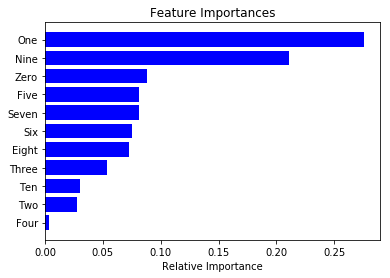

In [130]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
features = x_train.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Cross Validation on Random Forest to tune hyper parameters

In [141]:
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(n_jobs=-1, max_features='sqrt') 
 
# Use a grid over parameters of interest
param_grid = { 
           "n_estimators" : [10,20,30,35,40,50,60,70,80,90,100],
           "max_depth" : [2,5,10,15,20],
           "min_samples_leaf" : [1]}
 
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10)
CV_rfc.fit(X=x_train, y=y_train)
print (CV_rfc.best_score_, CV_rfc.best_params_) 

0.8932451582427964 {'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 20}


# F1 score increased by 0.2

In [143]:
y_trainpred = CV_rfc.predict(x_train)
y_valpred = CV_rfc.predict(x_val)
print(accuracy_score(y_train,y_trainpred))
print(accuracy_score(y_val,y_valpred))
le = preprocessing.LabelEncoder()
y_valf = le.fit_transform(y_val)
y_trainf= le.fit_transform(y_train)
y_valpredf = le.fit_transform(y_valpred)
y_trainpredf = le.fit_transform(y_trainpred)
print(f1_score(y_valf,y_valpredf))
print(f1_score(y_trainf,y_trainpredf))

0.9988978113682885
0.8706099815157117
0.41011235955056186
0.9988007538118896


In [639]:
!pip install xgboost

You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


# XGBoost gives a F1-score of 0.425 on Validation

In [138]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
XGB_model = XGBClassifier()
%time XGB_model.fit(X=x_train, y=y_train)
y_pred2 = XGB_model.predict(x_val)
print(accuracy_score(y_val , y_pred2))
y_pred2 = le.fit_transform(y_pred2)
print(f1_score(y_valf,y_pred2))
#print(classification_report(y_val , y_pred2 , digits = 4))
#print(confusion_matrix(y_val, y_pred2))

Wall time: 724 ms
0.8619839802834257
0.4256410256410256


In [135]:
XGB = XGBClassifier(n_jobs=-1)
 
# Use a grid over parameters of interest
param_grid = {
     'colsample_bytree': np.linspace(0.5, 0.9, 5),
     'n_estimators':[100, 200],
     'max_depth': [10, 15, 20, 25]
}
 
CV_XGB = GridSearchCV(estimator=XGB, param_grid=param_grid, cv= 10)

In [136]:
%time CV_XGB.fit(X=x_train, y=y_train)

Wall time: 15min 19s


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'colsample_bytree': array([0.5, 0.6, 0.7, 0.8, 0.9]), 'n_estimators': [100, 200], 'max_depth': [10, 15, 20, 25]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [139]:
y_pred2 = CV_XGB.predict(x_val)
print(accuracy_score(y_val , y_pred2))
y_pred2 = le.fit_transform(y_pred2)
print(f1_score(y_valf,y_pred2))

0.8632162661737524
0.37988826815642457


# Validation and Parameter Tuning
# I Split the train data into Train and Validation by doing a Stratified sampling on Providers using Potential Fraud , in 70:30 Ratio.
# Random forest was over fitting the train data, So I Did cross validation on number of estimators and max tree depth to avoid overfit, the accuracy and F1-score both increased on Validation data.

# Summary and Conclusion

# Could see that there are few attributes like Age,ClaimDays, AdmitDays, InscCliamAmt, State,County which would be able to predict the probability of fradulent provider. Business could use our predictive model above to determine whether the provider is  Fraud or not. They could run the predictive model periodically to flag the Fradulent providers, upon which Special investigation can be carried to actually determine whether the provider is Fraudulent or not. This reduces the overall cost and time incurred in weeding out fradulent providers significantly and thus providing a great Business value.

# Next steps would be to dig deeper to analyze why Fradulent transactions are more in certain State,counties etc.
# Also, If Business could provide Fradulent classification data at transaction level rather than provider level it would be more helpful . That way we would be able to predict the Fraud transactions as and when they occur and when the prorportion of fraud transactions under a provider increases beyond a threshold we can flag those providers as fradulent.